#   Exploratory Data Analysis - Practice Test
### Cut Hasna A

In this practice test, we have Europe Premier League 2018/19 as the dataset. 

The objectives are:
1.	Is this data clean?
2.	How is the point distribution of the epl team? And which team is an anomaly?
3.	Which team has the best attack? 
4.	Which team has the best defence? 
5.	Which team is good in the financial aspect? 

### Import and Understanding the Data

In [1]:
#import data from github

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/Syukrondzeko/Fellowship/main/epl_1819.csv')
df

,Team,category,general_league_position,finance _live_games_televised,finance _tv_revenue,general_matches_played,general_won,general_draw,general_lost,attack_scored,...,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,defence_penalty_conceeded,attack_posession,attack_pass_accuracy
0,Manchester City,Champions League,1,26,150986355,38,32,2,4,95,...,58,63,362,518,0,543,295,4,64.0,89.0
1,Liverpool,Champions League,2,29,152425146,38,30,7,1,89,...,76,78,314,610,2,639,317,1,58.8,84.4
2,Chelsea,Champions League Qualification,3,25,146030216,38,21,9,8,63,...,85,73,351,618,2,593,330,2,59.9,87.6
3,Tottenham,Champions League Qualification,4,26,145230801,38,23,2,13,67,...,121,112,326,626,3,770,411,5,56.7,83.2
4,Arsenal,Europa League,5,25,142193180,38,21,7,10,73,...,133,118,412,609,2,762,404,7,56.1,83.3
5,Manchester United,Europa League,6,27,142512868,38,19,9,10,65,...,122,128,355,581,2,785,370,6,53.3,82.3
6,Wolverhampton,Europa League Qualification,7,15,127165114,38,16,9,13,47,...,100,148,501,720,2,824,464,4,47.4,78.2
7,Everton,No UEFA Competitions,8,18,128603905,38,15,9,14,54,...,94,85,456,700,4,825,430,5,51.0,77.3
8,Leicester,No UEFA Competitions,9,15,123328078,38,15,7,16,51,...,90,96,436,676,4,945,500,5,50.8,79.2
9,West Ham,No UEFA Competitions,10,16,122528663,38,15,7,16,52,...,148,141,457,723,5,855,397,5,49.0,78.7


In [2]:
# Obtain understanding of the columns and meaning
df.columns

Index(['Team', 'category', 'general_league_position',
       'finance _live_games_televised', 'finance _tv_revenue',
       'general_matches_played', 'general_won', 'general_draw', 'general_lost',
       'attack_scored', 'defence_goals_conceeded', 'general_goal_difference',
       'general_points', 'general_squad_size', 'general_squad_average_age',
       'general_squad_foreigners', 'finance _team_market',
       'finance _market_average', 'attack_passes', 'attack_passes_through',
       'attack_passes_long', 'attack_passes_back', 'attack_crosses',
       'attack_corners_taken', 'attack_shots', 'attack_shots_on_target',
       'attack_goals_headed', 'attack_goals_penalty', 'attack_goals_box',
       'attack_goals_outsidebox', 'general_card_yellow', 'general_card_red',
       'attack_goals_counter', 'attack_goals_freekick', 'defence_saves',
       'defence_blocks', 'defence_interceptions', 'defence_tackles',
       'defence_tackles_last_man', 'defence_clearances',
       'defence_cleara

In [3]:
# We obtain information that datas categorization is not in sequence, so we sort the columns desc alphabetical
df = df.reindex(sorted(df.columns), axis = 1)
df

,Team,attack_corners_taken,attack_crosses,attack_goals_box,attack_goals_counter,attack_goals_freekick,attack_goals_headed,attack_goals_outsidebox,attack_goals_penalty,attack_pass_accuracy,...,general_draw,general_goal_difference,general_league_position,general_lost,general_matches_played,general_points,general_squad_average_age,general_squad_foreigners,general_squad_size,general_won
0,Manchester City,298,783,80,5,2,12,15,3,89.0,...,2,72,1,4,38,98,27.1,20,25,32
1,Liverpool,249,721,84,6,1,19,5,7,84.4,...,7,67,2,1,38,97,26.8,16,24,30
2,Chelsea,215,692,54,1,1,8,9,5,87.6,...,9,24,3,8,38,72,28.1,19,26,21
3,Tottenham,194,643,53,5,2,14,14,4,83.2,...,2,28,4,13,38,71,27.0,17,25,23
4,Arsenal,209,605,62,3,3,5,11,4,83.3,...,7,22,5,10,38,70,27.5,18,26,21
5,Manchester United,200,638,55,4,2,4,10,9,82.3,...,9,11,6,10,38,66,27.3,21,26,19
6,Wolverhampton,195,622,44,5,2,10,3,4,78.2,...,9,1,7,13,38,57,27.2,13,23,16
7,Everton,215,814,45,3,0,13,10,2,77.3,...,9,8,8,14,38,54,27.0,16,26,15
8,Leicester,210,779,43,8,3,9,8,5,79.2,...,7,3,9,16,38,52,29.0,18,26,15
9,West Ham,188,630,47,3,0,10,5,5,78.7,...,7,-3,10,16,38,52,28.3,18,26,15


## Q1: Is the data clean?

to obtain this answer we use several steps:
1. is there any null values
2. check the data types
3. correct the data types

In [4]:
# Check null values within datas
df.isnull().sum()

Team                             0
attack_corners_taken             0
attack_crosses                   0
attack_goals_box                 0
attack_goals_counter             0
attack_goals_freekick            0
attack_goals_headed              0
attack_goals_outsidebox          0
attack_goals_penalty             0
attack_pass_accuracy             0
attack_passes                    0
attack_passes_back               0
attack_passes_long               0
attack_passes_through            0
attack_posession                 0
attack_scored                    0
attack_shots                     0
attack_shots_on_target           0
category                         0
defence_blocks                   0
defence_clearances               0
defence_clearances_headed        0
defence_goals_conceeded          0
defence_interceptions            0
defence_penalty_conceeded        0
defence_saves                    0
defence_tackles                  0
defence_tackles_last_man         0
finance _live_games_

In [5]:
# We check info of the datas, columns name, null count, and type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   attack_corners_taken           20 non-null     int64  
 2   attack_crosses                 20 non-null     int64  
 3   attack_goals_box               20 non-null     int64  
 4   attack_goals_counter           20 non-null     int64  
 5   attack_goals_freekick          20 non-null     int64  
 6   attack_goals_headed            20 non-null     int64  
 7   attack_goals_outsidebox        20 non-null     int64  
 8   attack_goals_penalty           20 non-null     int64  
 9   attack_pass_accuracy           20 non-null     float64
 10  attack_passes                  20 non-null     object 
 11  attack_passes_back             20 non-null     object 
 12  attack_passes_long             20 non-null     objec

In [6]:
# After checking, with consideration of datas that should be integer instead of object

# Check and confirm the object of related column
df['defence_clearances']

0       543
1       639
2       593
3       770
4       762
5       785
6       824
7       825
8       945
9       855
10      956
11      940
12    1,120
13    1,019
14    1,080
15    1,068
16      921
17      978
18      971
19      658
Name: defence_clearances, dtype: object

In [8]:
# Convert 4 columns'attack_passes', 'attack_passes_back', 'attack_passes_long', 'defence_clearances' to int64

df['attack_passes'] = df['attack_passes'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_long'] = df['attack_passes_long'].replace({',' : ''}, regex=True).astype('int64')
df['attack_passes_back'] = df['attack_passes_back'].replace({',' : ''}, regex=True).astype('int64')
df['defence_clearances'] = df['defence_clearances'].replace({',' : ''}, regex=True).astype('int64')

# re-check the change of data type 
df['attack_passes']

0     26581
1     23638
2     25070
3     21295
4     20805
5     19202
6     16618
7     16494
8     17219
9     16358
10    15462
11    15243
12    13490
13    15943
14    13011
15    14297
16    14109
17    10226
18    17699
19    15902
Name: attack_passes, dtype: int64

In [9]:
# re-check the dtype after converting column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Team                           20 non-null     object 
 1   attack_corners_taken           20 non-null     int64  
 2   attack_crosses                 20 non-null     int64  
 3   attack_goals_box               20 non-null     int64  
 4   attack_goals_counter           20 non-null     int64  
 5   attack_goals_freekick          20 non-null     int64  
 6   attack_goals_headed            20 non-null     int64  
 7   attack_goals_outsidebox        20 non-null     int64  
 8   attack_goals_penalty           20 non-null     int64  
 9   attack_pass_accuracy           20 non-null     float64
 10  attack_passes                  20 non-null     int64  
 11  attack_passes_back             20 non-null     int64  
 12  attack_passes_long             20 non-null     int64

## Q2: How is the points distribution, is there any anomaly Team?

In this part we see the distribution of datas generated from general points variable. The objective is to see whether there is any anomaly or outlier. 

In [10]:
# point distribution of the EPL teams

df['general_points']

0     98
1     97
2     72
3     71
4     70
5     66
6     57
7     54
8     52
9     52
10    50
11    49
12    45
13    45
14    40
15    39
16    36
17    34
18    26
19    16
Name: general_points, dtype: int64

### Creating plot to see distribution

There are 4 ways that we use to see distribution:
1. Use boxplot for univariate data
2. Use histogram to see the overall distribution
3. Confirm the skewness and kurtosis
4. Calculate outlier using IRQ formula

### 1. Boxplot for univariate data

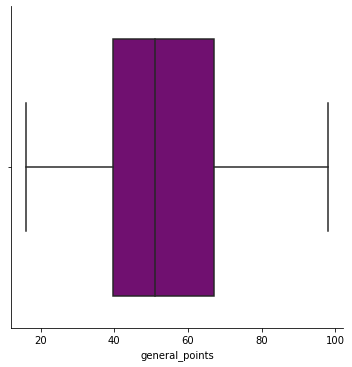

In [11]:
# making plot to check anomaly point
sns.catplot(x='general_points', kind='box', data=df, color='purple')

### 2. Histogram

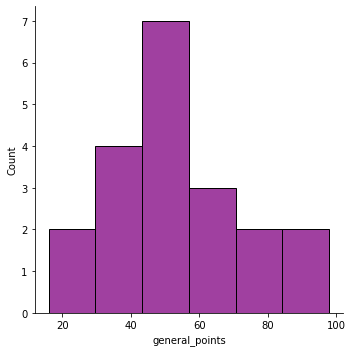

In [12]:
# check point distribution with histogram
sns.displot(df, x = 'general_points', color = 'purple')

In [13]:
# check overall description of points data
df['general_points'].describe()

count    20.000000
mean     53.450000
std      21.007455
min      16.000000
25%      39.750000
50%      51.000000
75%      67.000000
max      98.000000
Name: general_points, dtype: float64

### 3. Skewness and Kurtosis

From the data generated below, we can see that the data is moderately skewed

In [14]:
# calculate the skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew

kurtosis = kurtosis(df['general_points'], bias=False)
skew = skew(df['general_points'], bias=False)

print(kurtosis, skew)

0.4322579019809334 0.6098933299918189


### 4. Calculate IQR

Based on the data below we can say that there is no team that is the outlier since the results are all False

In [15]:
# calculate the outlier by IQR

Q1 = df['general_points'].quantile(0.25)
Q3 = df['general_points'].quantile(0.75)
IQR = Q3-Q1
print(IQR)
print(df['general_points'] < (Q1 - 1.5 * IQR )) | (df['general_points'] > (Q3 + 1.5 * IQR))

27.25
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: general_points, dtype: bool


TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

## Q3: Which team is the best attack?

Attack is the movement of the team in possession of the ball. Team with the best attack is those who generate the highest attempt of attack. Assuming that all attack variables in this dataset is positively affecting the attack and part of their team strategy, here are the variables:

- attack_scored	
- attack_passes	
- attack_passes_through	
- attack_passes_long
- attack_passes_back
- attack_crosses
- attack_corners_taken	
- attack_shots	
- attack_shots_on_target	
- attack_goals_headed	
- attack_goals_penalty	
- attack_goals_box	
- attack_goals_outsidebox	
- attack_goals_counter	
- attack_goals_freekick	
- attack_posession	
- attack_pass_accuracy

we then use the mean from all variables to see the best team

### 1. Display the attack variables

In [16]:
# assuming all attack variables here are part of soccer team strategy, all attack variables are included
# display only the needed columns 
df_attack =df[['attack_scored', 'attack_passes', 'attack_passes_through', 'attack_passes_long', 'attack_passes_back',
                'attack_crosses', 'attack_corners_taken', 'attack_shots', 'attack_shots_on_target', 'attack_goals_headed',
                'attack_goals_penalty', 'attack_goals_box', 'attack_goals_outsidebox', 'attack_goals_counter', 'attack_goals_freekick',
                'attack_posession', 'attack_pass_accuracy']]

df_attack

,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy
0,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0
1,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4
2,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6
3,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2
4,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3
5,65,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3,82.3
6,47,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4,78.2
7,54,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0,77.3
8,51,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8,79.2
9,52,16358,75,2315,2273,630,188,441,157,10,5,47,5,3,0,49.0,78.7


### 2. Add a column of overall average

In [17]:
df_attack['overall_attack'] = df_attack.mean(axis=1)
df_attack

<ipython-input-17-b7be9c2f8331>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attack['overall_attack'] = df_attack.mean(axis=1)


,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,overall_attack
0,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0,2066.823529
1,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4,1854.541176
2,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6,1933.205882
3,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2,1688.347059
4,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3,1634.435294
5,65,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3,82.3,1530.270588
6,47,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4,78.2,1377.800000
7,54,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0,77.3,1362.429412
8,51,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8,79.2,1422.352941
9,52,16358,75,2315,2273,630,188,441,157,10,5,47,5,3,0,49.0,78.7,1334.511765


In [18]:
# input data related team name and general league position
df_attackteam = df[['Team', 'general_league_position']].join(df_attack)
df_attackteam

,Team,general_league_position,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,overall_attack
0,Manchester City,1,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0,2066.823529
1,Liverpool,2,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4,1854.541176
2,Chelsea,3,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6,1933.205882
3,Tottenham,4,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2,1688.347059
4,Arsenal,5,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3,1634.435294
5,Manchester United,6,65,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3,82.3,1530.270588
6,Wolverhampton,7,47,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4,78.2,1377.800000
7,Everton,8,54,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0,77.3,1362.429412
8,Leicester,9,51,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8,79.2,1422.352941
9,West Ham,10,52,16358,75,2315,2273,630,188,441,157,10,5,47,5,3,0,49.0,78.7,1334.511765


In [19]:
# sort overall_attack to generate value from the highest
df_attackteam = df_attackteam.sort_values(by = 'overall_attack', ascending = False)
df_attackteam

,Team,general_league_position,attack_scored,attack_passes,attack_passes_through,attack_passes_long,attack_passes_back,attack_crosses,attack_corners_taken,attack_shots,attack_shots_on_target,attack_goals_headed,attack_goals_penalty,attack_goals_box,attack_goals_outsidebox,attack_goals_counter,attack_goals_freekick,attack_posession,attack_pass_accuracy,overall_attack
0,Manchester City,1,95,26581,112,1814,4240,783,298,683,260,12,3,80,15,5,2,64.0,89.0,2066.823529
2,Chelsea,3,63,25070,146,1774,3874,692,215,607,198,8,5,54,9,1,1,59.9,87.6,1933.205882
1,Liverpool,2,89,23638,98,2250,3416,721,249,575,226,19,7,84,5,6,1,58.8,84.4,1854.541176
3,Tottenham,4,67,21295,87,2267,3191,643,194,537,189,14,4,53,14,5,2,56.7,83.2,1688.347059
4,Arsenal,5,73,20805,65,2062,3102,605,209,467,170,5,4,62,11,3,3,56.1,83.3,1634.435294
5,Manchester United,6,65,19202,63,2242,2634,638,200,526,225,4,9,55,10,4,2,53.3,82.3,1530.270588
18,Fulham,19,34,17699,33,2417,2750,611,161,454,146,7,2,30,4,2,0,49.2,80.3,1439.970588
8,Leicester,9,51,17219,88,2335,2593,779,210,515,184,9,5,43,8,8,3,50.8,79.2,1422.352941
6,Wolverhampton,7,47,16618,51,2552,2515,622,195,477,152,10,4,44,3,5,2,47.4,78.2,1377.800000
7,Everton,8,54,16494,44,2310,2362,814,215,498,169,13,2,45,10,3,0,51.0,77.3,1362.429412


### 3. Obtain the best team 

In [20]:
# obtain best team for attack
best_team_attack = df_attackteam.head(1)
best_team_attack[['Team','general_league_position','overall_attack']]

,Team,general_league_position,overall_attack
0,Manchester City,1,2066.823529


## Q4: Which team is the best defense?

Defense is the act of preventing an opponent from scoring. Team with the best defense are those with highest number of defense. Assuming that the defense is not affected by goals and penalty conceeded, here are the variables:

- defence_saves                    
- defence_blocks                   
- defence_interceptions            
- defence_tackles                  
- defence_tackles_last_man         
- defence_clearances               
- defence_clearances_headed  

we then select team with the highest average from these variables as the best defense team

### 1. Display the defense variable

In [21]:
# assuming the defense is not affected by goals conceded and penalty conceded
# display only related defense columns

df_defense = df[['defence_saves', 'defence_blocks', 'defence_interceptions', 'defence_tackles', 
                 'defence_tackles_last_man', 'defence_clearances', 'defence_clearances_headed']]
df_defense

,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed
0,58,63,362,518,0,543,295
1,76,78,314,610,2,639,317
2,85,73,351,618,2,593,330
3,121,112,326,626,3,770,411
4,133,118,412,609,2,762,404
5,122,128,355,581,2,785,370
6,100,148,501,720,2,824,464
7,94,85,456,700,4,825,430
8,90,96,436,676,4,945,500
9,148,141,457,723,5,855,397


### 2. Add a column of overall average

Adding a column for the overall average and then sort the data descending

In [22]:
# adding mean of defense variable as a new column
df_defense['overall_defense'] = df_defense.mean(axis=1)
df_defense

<ipython-input-22-a48a80e8aaca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defense['overall_defense'] = df_defense.mean(axis=1)


,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,overall_defense
0,58,63,362,518,0,543,295,262.714286
1,76,78,314,610,2,639,317,290.857143
2,85,73,351,618,2,593,330,293.142857
3,121,112,326,626,3,770,411,338.428571
4,133,118,412,609,2,762,404,348.571429
5,122,128,355,581,2,785,370,334.714286
6,100,148,501,720,2,824,464,394.142857
7,94,85,456,700,4,825,430,370.571429
8,90,96,436,676,4,945,500,392.428571
9,148,141,457,723,5,855,397,389.428571


In [23]:
# input data related team name and general league position
df_defenseteam = df[['Team', 'general_league_position']].join(df_defense)
df_defenseteam 

,Team,general_league_position,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,overall_defense
0,Manchester City,1,58,63,362,518,0,543,295,262.714286
1,Liverpool,2,76,78,314,610,2,639,317,290.857143
2,Chelsea,3,85,73,351,618,2,593,330,293.142857
3,Tottenham,4,121,112,326,626,3,770,411,338.428571
4,Arsenal,5,133,118,412,609,2,762,404,348.571429
5,Manchester United,6,122,128,355,581,2,785,370,334.714286
6,Wolverhampton,7,100,148,501,720,2,824,464,394.142857
7,Everton,8,94,85,456,700,4,825,430,370.571429
8,Leicester,9,90,96,436,676,4,945,500,392.428571
9,West Ham,10,148,141,457,723,5,855,397,389.428571


In [24]:
# sort overall_defense to generate value from the highest
df_defenseteam = df_defenseteam .sort_values(by = 'overall_defense', ascending = False)
df_defenseteam 

,Team,general_league_position,defence_saves,defence_blocks,defence_interceptions,defence_tackles,defence_tackles_last_man,defence_clearances,defence_clearances_headed,overall_defense
12,Newcastle,13,95,134,506,714,4,1120,564,448.142857
15,Southampton,16,114,153,548,699,4,1068,502,441.142857
14,Burnley,15,140,222,365,583,5,1080,539,419.142857
17,Cardiff,18,141,147,528,655,4,978,448,414.428571
16,Brighton,17,111,170,463,681,4,921,499,407.000000
11,Crystal Palace,12,113,141,446,730,2,940,467,405.571429
6,Wolverhampton,7,100,148,501,720,2,824,464,394.142857
8,Leicester,9,90,96,436,676,4,945,500,392.428571
10,Watford,11,127,120,426,655,8,956,447,391.285714
18,Fulham,19,147,144,433,591,0,971,443,389.857143


### 3. Obtain the best team for defense

In [25]:
# get the head as the highest team of defense
best_team_defense = df_defenseteam.head(1)
best_team_defense[['Team','general_league_position','overall_defense']]

,Team,general_league_position,overall_defense
12,Newcastle,13,448.142857


## Q5: Which team is good in financial aspects?

Generally, good financial aspects is reflected by the revenue. But on this dataset, we will inspect the team that has financial wellbeing based on these aspects:

1. Overall finance performane
2. Revenue from TV
3. Team market
4. Market Average

### 1. Overall financial performance

This will be calculated by mean of 3 variables:
- finance_tv revenue/finance_live_games_televised
- finance_team_market
- finance_market average

#### Display variables related 

In [38]:
# display datas related to finance

df_fin = df[['Team', 'finance _live_games_televised' ,'finance _tv_revenue', 'finance _team_market', 'finance _market_average']]
df_fin

,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,26,150986355,1003200000,39987200
1,Liverpool,29,152425146,836440000,34848000
2,Chelsea,25,146030216,779460000,29981600
3,Tottenham,26,145230801,735240000,29409600
4,Arsenal,25,142193180,701800000,26989600
5,Manchester United,27,142512868,550440000,22017600
6,Wolverhampton,15,127165114,369600000,16068800
7,Everton,18,128603905,305360000,11748000
8,Leicester,15,123328078,284240000,10929600
9,West Ham,16,122528663,234212000,9011200


### Replace the finance_tv_revenue column

Assuming that the tv revenue generated from live games televised, we will divide them instead. and then drop the live games televised column

#### Divide the two columns

In [28]:
# assuming that tv revenue comes from live game televised
# TV revenue per games is included as a substitute of finance_tv_revenue

df_fin['finance _tv_revenue'] = df['finance _tv_revenue']/df['finance _live_games_televised']
df_fin

<ipython-input-28-6f07e20f0df4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['finance _tv_revenue'] = df['finance _tv_revenue']/df['finance _live_games_televised']


,Team,finance _live_games_televised,finance _tv_revenue,finance _team_market,finance _market_average
0,Manchester City,26,5.807168e+06,1003200000,39987200
1,Liverpool,29,5.256040e+06,836440000,34848000
2,Chelsea,25,5.841209e+06,779460000,29981600
3,Tottenham,26,5.585800e+06,735240000,29409600
4,Arsenal,25,5.687727e+06,701800000,26989600
5,Manchester United,27,5.278254e+06,550440000,22017600
6,Wolverhampton,15,8.477674e+06,369600000,16068800
7,Everton,18,7.144661e+06,305360000,11748000
8,Leicester,15,8.221872e+06,284240000,10929600
9,West Ham,16,7.658041e+06,234212000,9011200


#### Drop the finance_live_games_televised column

In [32]:
# drop finance_game_televised

df_fin['overall_average'] = df_fin.mean(axis=1)
df_3var = df_fin.drop(['finance _live_games_televised'], axis=1)
df_3var

,Team,finance _tv_revenue,finance _team_market,finance _market_average,overall_average
0,Manchester City,5.807168e+06,1003200000,39987200,2.622486e+08
1,Liverpool,5.256040e+06,836440000,34848000,2.191360e+08
2,Chelsea,5.841209e+06,779460000,29981600,2.038207e+08
3,Tottenham,5.585800e+06,735240000,29409600,1.925589e+08
4,Arsenal,5.687727e+06,701800000,26989600,1.836193e+08
5,Manchester United,5.278254e+06,550440000,22017600,1.444340e+08
6,Wolverhampton,8.477674e+06,369600000,16068800,9.853662e+07
7,Everton,7.144661e+06,305360000,11748000,8.106317e+07
8,Leicester,8.221872e+06,284240000,10929600,7.584787e+07
9,West Ham,7.658041e+06,234212000,9011200,6.272031e+07


#### Sort and obtain the best overall financial performance

In [34]:
#sort the finance data

df_finance = df_3var.sort_values(by='overall_average', ascending=False)
df_finance

,Team,finance _tv_revenue,finance _team_market,finance _market_average,overall_average
0,Manchester City,5.807168e+06,1003200000,39987200,2.622486e+08
1,Liverpool,5.256040e+06,836440000,34848000,2.191360e+08
2,Chelsea,5.841209e+06,779460000,29981600,2.038207e+08
3,Tottenham,5.585800e+06,735240000,29409600,1.925589e+08
4,Arsenal,5.687727e+06,701800000,26989600,1.836193e+08
5,Manchester United,5.278254e+06,550440000,22017600,1.444340e+08
6,Wolverhampton,8.477674e+06,369600000,16068800,9.853662e+07
7,Everton,7.144661e+06,305360000,11748000,8.106317e+07
8,Leicester,8.221872e+06,284240000,10929600,7.584787e+07
9,West Ham,7.658041e+06,234212000,9011200,6.272031e+07


In [37]:
# obtain the best overall finance performance

best_finance_team = df_finance.head(1)
best_finance_team[['Team', 'overall_average']]

,Team,overall_average
0,Manchester City,2.622486e+08


### 2. Highest Revenue from TV

We assume that all the tv revenue is generated from live games. Thus the results are the ones divided

In [66]:
tv_revenue = df_finance[['Team', 'finance _tv_revenue']].sort_values(by = 'finance _tv_revenue', ascending=False)
tv_revenue

,Team,finance _tv_revenue
10,Watford,1.138955e+07
13,Bournemouth,1.081400e+07
15,Southampton,1.043029e+07
14,Burnley,9.758233e+06
19,Huddersfield,9.662886e+06
11,Crystal Palace,9.517935e+06
17,Cardiff,8.558676e+06
6,Wolverhampton,8.477674e+06
8,Leicester,8.221872e+06
16,Brighton,8.133979e+06


In [68]:
highest_tvrevenue = tv_revenue.head(1)
highest_tvrevenue

,Team,finance _tv_revenue
10,Watford,11389552.7


### 3. Team Market

We use the variable finance_team_market here

In [71]:
team_market = df_finance[['Team','finance _team_market']].sort_values(by='finance _team_market', ascending=False)
team_market

,Team,finance _team_market
0,Manchester City,1003200000
1,Liverpool,836440000
2,Chelsea,779460000
3,Tottenham,735240000
4,Arsenal,701800000
5,Manchester United,550440000
6,Wolverhampton,369600000
7,Everton,305360000
8,Leicester,284240000
9,West Ham,234212000


In [96]:
highest_team_market = team_market.head(1)
highest_team_market

,Team,finance _team_market
0,Manchester City,1003200000


In [94]:
htm_value = highest_tm['finance _team_market']
ltm_value = lowest_tm['finance _team_market']
print(htm_value)
print(ltm_value)

print(htm_value - ltm_value

0    1003200000
Name: finance _team_market, dtype: int64
19    85492000
Name: finance _team_market, dtype: int64


0    NaN
19   NaN
Name: finance _team_market, dtype: float64

### 4. Market Average



In [97]:
market_avg = df_finance[['Team','finance _market_average']].sort_values(by='finance _market_average', ascending=False)
market_avg

,Team,finance _market_average
0,Manchester City,39987200
1,Liverpool,34848000
2,Chelsea,29981600
3,Tottenham,29409600
4,Arsenal,26989600
5,Manchester United,22017600
6,Wolverhampton,16068800
7,Everton,11748000
8,Leicester,10929600
12,Newcastle,10700800


In [99]:
highest_market_average = market_avg.head(1)
highest_market_average

,Team,finance _market_average
0,Manchester City,39987200


## Q6: Explore your creativity

Here we display the correlation between attack scored and general won. Also the correlation between tv revenue and general league position

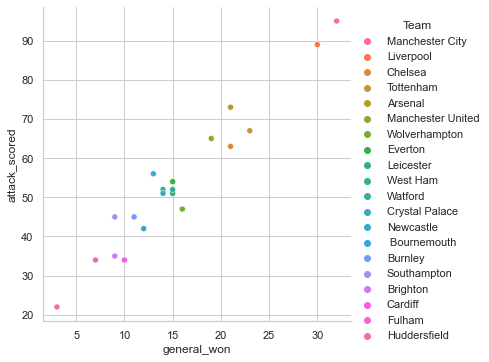

In [117]:
sns.relplot(x = 'general_won', y = 'attack_scored', hue = 'Team', data = df)

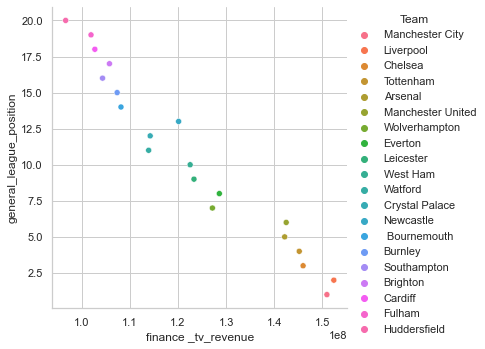

In [121]:
sns.relplot(x = 'finance _tv_revenue', y = 'general_league_position', hue = 'Team', data = df)